### 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 `keras.datasets`에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 `train_test_split` 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import callbacks
from tensorflow.keras import utils

# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR 10 data load
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터 셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [2]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

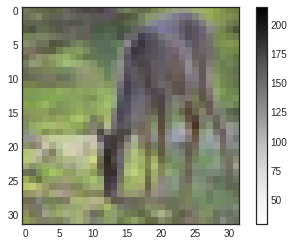

In [3]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [4]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [5]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# 훈련 데이터 형태 변경
x_train = x_train.reshape((40000, 32, 32, 3))
# 검증 데이터 형태 변경
x_val = x_val.reshape((10000, 32, 32, 3))
# 테스트 데이터 형태 변경
x_test = x_test.reshape((10000, 32, 32, 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [7]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

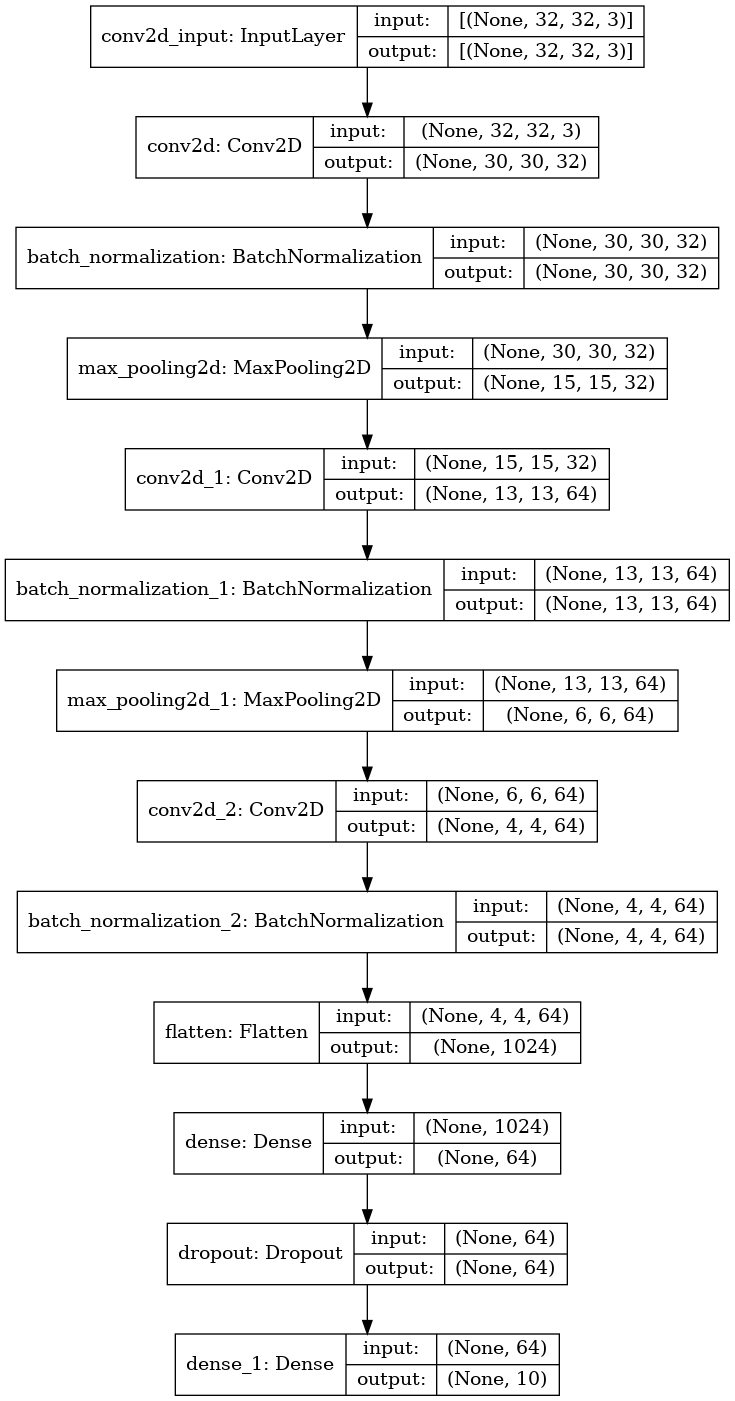

In [9]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint
checkpoint_callback = callbacks.ModelCheckpoint(filepath='model_checkpoint.h5',
                                               monitor='val_accuracy',
                                               save_best_only=True,
                                               verbose=1)
# EarlyStopping
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  restore_best_weights=True,
                                                  verbose=1)
# 모델 학습
history = model.fit(x_train, y_train, epochs=30, batch_size=32,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/30
1250/1250 [==============================] - 9s 5ms/step - loss: 1.9110 - accuracy: 0.3375 - val_loss: 1.3890 - val_accuracy: 0.4950

Epoch 00001: val_accuracy improved from -inf to 0.49500, saving model to model_checkpoint.h5
Epoch 2/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4809 - accuracy: 0.4667 - val_loss: 1.7697 - val_accuracy: 0.4139

Epoch 00002: val_accuracy did not improve from 0.49500
Epoch 3/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3349 - accuracy: 0.5264 - val_loss: 1.4213 - val_accuracy: 0.4907

Epoch 00003: val_accuracy did not improve from 0.49500
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2256 - accuracy: 0.5646 - val_loss: 1.1434 - val_accuracy: 0.5902

Epoch 00004: val_accuracy improved from 0.49500 to 0.59020, saving model to model_checkpoint.h5
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1588 - accuracy: 0.5903 - val_loss: 1.0942 

- 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

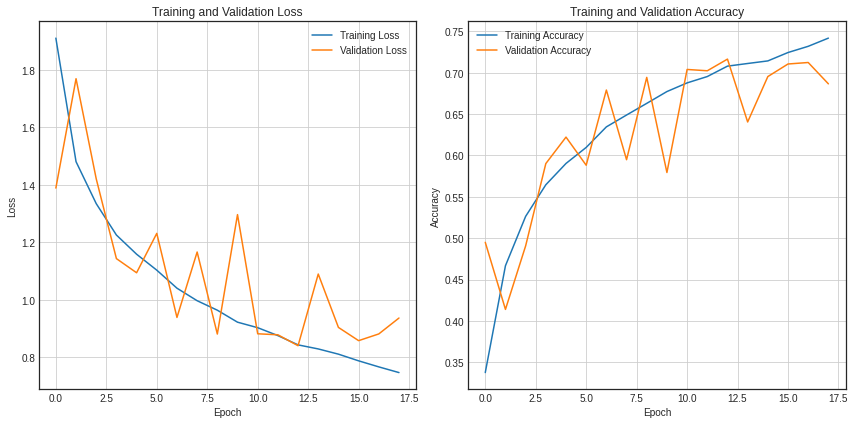

In [11]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# 손실과 정확도 그래프를 한 번에 보여주기 위해 1x2 subplot 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 손실 그래프
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# 정확도 그래프
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [12]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8407 - accuracy: 0.7238


[0.8406670093536377, 0.723800003528595]